In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="ticks")


# Build Dataset

In [101]:
f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_16757b9460_sub_True"
f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_0af6565550_sub_True"
f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_bccd0ee85d_sub_True"

files = [f_model, f_coocorrence, f_most_popular]
names = ["model", 'coocorrence', 'most_popular']

path = files[0]+'/eval_dataset.csv'
df   = pd.read_csv(path).reset_index()

df.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,ndcg_ml
0,0,0,0,1748830,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209519
1,1,1,1,228737,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.867699
2,2,2,2,1909110,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3,3,3,1197370,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,4,4,2049207,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
index                                   1000 non-null int64
Unnamed: 0                              1000 non-null int64
SessionID                               1000 non-null int64
ItemID                                  1000 non-null int64
Timestamp                               1000 non-null object
event_type_idx                          1000 non-null int64
event_search                            1000 non-null object
domain_count                            1000 non-null int64
item_id_count                           1000 non-null float64
event_type_click                        1000 non-null int64
domain_id                               1000 non-null object
condition                               1000 non-null object
category_id                             1000 non-null object
item_id                                 1000 non-null int64
price                                   1000 no

In [103]:
df.columns

Index(['index', 'Unnamed: 0', 'SessionID', 'ItemID', 'Timestamp',
       'event_type_idx', 'event_search', 'domain_count', 'item_id_count',
       'event_type_click', 'domain_id', 'condition', 'category_id', 'item_id',
       'price', 'product_id', 'title', 'category_idx', 'condition_idx',
       'domain_idx', 'last_ItemID', 'last_category_idx', 'last_product_id',
       'last_ItemID_title', 'last_event_search', 'last_event_type_idx',
       'last_title_search', 'step', 'previous_t', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'price_norm', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'visit', 'step_history', 'timestamp_history', 'cum_timestamp_history',
       'event_type_idx_history', 'category_idx_history',
       'condition_idx_history', 'domain_idx_history', 'product_id_history',
       'price_history', 'ItemID_history', 'title_search_history

In [104]:
features = [
       'last_category_idx', 'last_product_id',
       'last_event_type_idx', 'step', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'mode_category_idx_history', 'mode_condition_idx_history',
       'mode_domain_idx_history', 'mode_product_id_history',
       'mode_event_type_idx_history', 'count_mode_category_idx_history',
       'count_mode_condition_idx_history', 'count_mode_domain_idx_history',
       'count_mode_product_id_history', 'count_mode_event_type_idx_history',
       'count_event_type_idx_history__search',
       'count_event_type_idx_history__view', 'count_condition_idx__new',
       'count_condition_idx__used', 'perc_newlest_search', 'perc_event_view']

features = [
       'step', 'cum_Timestamp', 
       'count_event_type_idx_history__search', 'count_event_type_idx_history__view', 
       'perc_newlest_search', 'perc_event_view']


df_all = []
for i in range(len(files)):
    path = files[i]+'/eval_dataset.csv'
    _df   = pd.read_csv(path).reset_index()[['index', 'ndcg_ml']]
    _df[names[i]+'@ndcg_ml']  = _df['ndcg_ml']
    df_all.append(_df)

    
#df_all = pd.concat(df_all)    

classes = []
for i, row in df.iterrows():
    scores = [df_all[n].iloc[i]['ndcg_ml'] for n in range(len(names))]
    idx_max = np.argmax(scores)
    if np.max(scores) > 0.1:
        classes.append(names[idx_max])
    else:
        classes.append(names[0])
df['class'] = classes       
df.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,ndcg_ml,class
0,0,0,0,1748830,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209519,coocorrence
1,1,1,1,228737,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.867699,model
2,2,2,2,1909110,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,model
3,3,3,3,1197370,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,model
4,4,4,4,2049207,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,model


In [105]:
_df.head()

,index,ndcg_ml,most_popular@ndcg_ml
0,0,0.163368,0.163368
1,1,0.000000,0.000000
2,2,0.000000,0.000000
3,3,0.018329,0.018329
4,4,0.077266,0.077266


In [106]:
df['class'].value_counts()

model           934
coocorrence      37
most_popular     29
Name: class, dtype: int64

## Train 

In [107]:
df[features].head()

,step,cum_Timestamp,count_event_type_idx_history__search,count_event_type_idx_history__view,perc_newlest_search,perc_event_view
0,20,1916,1,17,1.00,0.94
1,14,597,5,7,0.83,0.58
2,3,0,0,1,1.00,1.00
3,14,5374,5,7,0.29,0.58
4,70,7553,10,10,1.00,0.50


In [108]:
df[features].iloc[0]

step                                      20.00
cum_Timestamp                           1916.00
count_event_type_idx_history__search       1.00
count_event_type_idx_history__view        17.00
perc_newlest_search                        1.00
perc_event_view                            0.94
Name: 0, dtype: float64

In [109]:
int_features = ['last_category_idx', 'last_product_id', 'last_event_type_idx', 'last_domain_idx']
for f in int_features:
    df[f] = df[f].astype(int)

In [110]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
step                                    1000 non-null int64
cum_Timestamp                           1000 non-null int64
count_event_type_idx_history__search    1000 non-null int64
count_event_type_idx_history__view      1000 non-null int64
perc_newlest_search                     1000 non-null float64
perc_event_view                         1000 non-null float64
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split


X, y = df[features].fillna(0), df['class']
clf = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0, class_weight='balanced')

clf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       random_state=0)

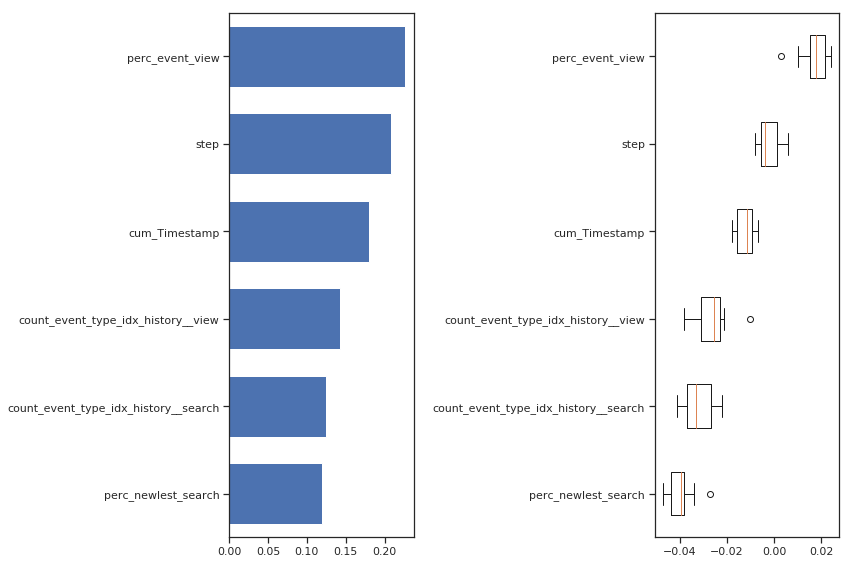

In [112]:
# plot
result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(features)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(features)[tree_importance_sorted_idx])
fig.tight_layout()
plt.show()

## Inference

In [113]:
# df_eval = df_train[['step', 'perc_event_view', "perc_newlest_search",
#               'count_mode_event_type_idx_history','count_event_type_idx_history__search', 'class',
#               'ndcg_ml']]
# df_eval['zero'] = df_eval['ndcg_ml'] == 0
# df_eval
# sns.pairplot(df_eval,  hue="class", height=4)

In [114]:
#SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False
#f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False"
#f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_700919816c_sub_False"
#f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False"

f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_16757b9460_sub_True"
f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_0af6565550_sub_True"
f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____897c16bdda_bccd0ee85d_sub_True"

files = [f_model, f_coocorrence, f_most_popular]
names = ["model", 'coocorrence', 'most_popular']

path      = files[0]+'/dataset_indexed.csv'
df_pred   = pd.read_csv(path).reset_index()

df_pred[features].head()

,step,cum_Timestamp,count_event_type_idx_history__search,count_event_type_idx_history__view,perc_newlest_search,perc_event_view
0,20,1916,1,17,1.00,0.94
1,14,597,5,7,0.83,0.58
2,3,0,0,1,1.00,1.00
3,14,5374,5,7,0.29,0.58
4,70,7553,10,10,1.00,0.50


In [115]:
df_pred[features].describe()

,step,cum_Timestamp,count_event_type_idx_history__search,count_event_type_idx_history__view,perc_newlest_search,perc_event_view
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29.797000,2432.011000,5.887000,6.480000,0.825940,0.511460
std,36.443737,2804.522527,5.408094,5.494888,0.357127,0.327353
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,1.000000,2.000000,0.950000,0.250000
50%,16.000000,1201.000000,5.000000,5.000000,1.000000,0.500000
75%,39.000000,4458.000000,10.000000,10.000000,1.000000,0.772500
max,280.000000,9755.000000,20.000000,20.000000,1.000000,1.000000


In [132]:
df_pred['model'] = clf.predict(df_pred[features])
df_pred['model'] = df_pred.apply(lambda row: 'most_popular' if row.step <= 2 else 'model', axis=1)
df_pred.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,count_mode_event_type_idx_history,count_event_type_idx_history__search,count_event_type_idx_history__view,count_condition_idx__new,count_condition_idx__used,perc_newlest_search,perc_event_view,dense_features,Index,model
0,0,0,3,22918,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,17,1,17,17,0,1.00,0.94,"[0.046, 0.193, 0.85, 0.85, 0.85, 0.85, 0.85, 0...",0,model
1,1,1,4,34272,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,7,5,7,5,1,0.83,0.58,"[0.031, 0.06, 0.35, 0.25, 0.35, 0.2, 0.35, 0.2...",1,model
2,2,2,0,27908,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,1,0,1,1,0,1.00,1.00,"[0.003, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",2,model
3,3,3,84373,5998,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,7,5,7,2,5,0.29,0.58,"[0.031, 0.541, 0.25, 0.25, 0.25, 0.35, 0.35, 0...",3,model
4,4,4,121348,32166,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,10,10,10,20,0,1.00,0.50,"[0.175, 0.76, 0.6, 1.0, 0.6, 0.85, 0.5, 0.5, 0...",4,model


In [133]:
df_pred['model'].value_counts()

model           933
most_popular     67
Name: model, dtype: int64

In [134]:
# load submission

df_sub = {}
for i in range(len(files)):
    path = files[i]+'/submission_{}.csv'.format(files[i].split("/")[-1])
    _df   = pd.read_csv(path, header=None)
    df_sub[names[i]] = _df

df_sub.keys()

dict_keys(['model', 'coocorrence', 'most_popular'])

In [135]:
df_pred['model']

0      model
1      model
2      model
3      model
4      model
       ...  
995    model
996    model
997    model
998    model
999    model
Name: model, Length: 1000, dtype: object

In [136]:
final_sub = []
for i, row in df_pred[['model']].iterrows():
    final_sub.append(list(df_sub[row.model].iloc[i].values)[:10])

In [137]:
np.savetxt('data/final_submission.csv', final_sub, fmt='%i', delimiter=',') 